# Classification: Logistic Regression

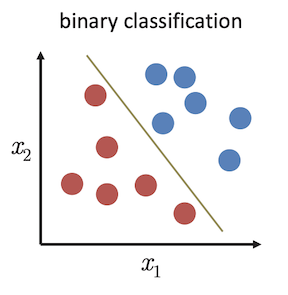

## Agenda
- Explain the form of logistic regression
- Learn through example

**Classification techniques** 
- Form the other half of supervised learning.
- Account for a substantial number of problems.


**Logistic Regression** 

- Describes and estimates the relationship between dependent binary variable and independent variables.
- **logistic regression models the probability that Y belongs to a particular category.**
- One of the most simple and commonly used Machine Learning algorithms for two-class classification. 
- Easy to implement 
- Used as the baseline for binary classification problems. 
- Its basic fundamental concepts are also constructive in deep learning. 



## Logistic Function

- In the simple linear regression model, we modelled the relationship between outcome and features with a linear equation:


$${y}=\beta_{0}+\beta_{1}x_{1}$$


- For classification, we prefer probabilities between 0 and 1, so we wrap the right side of the equation into the logistic function. 
- Forcing the output to assume values between 0 and 1.


$$p(x)=\frac{e^{\beta_0+\beta_1x}}{1+e^{\beta_0+\beta_1x}}$$

- Where $p(x) = Pr(Y = 1|x)$
- Logistic Regression models can be regularized using $\ell_1$ or $\ell_2$ penalties. 
- Scitkit-Learn adds an $\ell_2$ penalty by default.

### The logistic (Sigmoid) function will always produce an S-shaped curve

- The logistic functions squeezes the output of a linear equation between 0 and 1
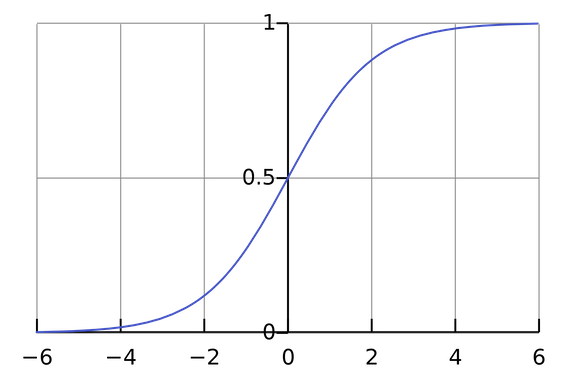


**Use of Sigmoid function**
- When the probability of y being 1 is greater than 0.5 then we can predict y = 1
- Else we predict y = 0

### Example

In [14]:
from sklearn import datasets
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(font_scale=1.5)

In [15]:
bc=pd.read_csv('breast_cancer_scikit_onehot_dataset.csv')
bc.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


In [16]:
target = bc['class'].map(lambda x: 1 if x == 4 else 0).values 

In [17]:
target = pd.Series(target)

In [18]:
#target=bc['class']

In [19]:
predictor=bc.drop(columns=['class'])

In [20]:
target.value_counts(normalize=True)

0    0.634446
1    0.365554
dtype: float64

In [21]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size=0.3,random_state=9) 

In [36]:
#Create a logistic Classifier
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1.0, class_weight ='balanced')

#Train the model using the training sets
log_reg.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = log_reg.predict(X_test)

In [34]:
yprob = log_reg.predict_proba(X_test)
yprob
yprob[:5]

array([[9.93385286e-01, 6.61471371e-03],
       [2.64280417e-02, 9.73571958e-01],
       [9.72453685e-01, 2.75463146e-02],
       [4.84158265e-05, 9.99951584e-01],
       [9.74836113e-01, 2.51638870e-02]])

In [35]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9590643274853801


## Confusion Matrix

- Used to evaluate the performance of a classifier.
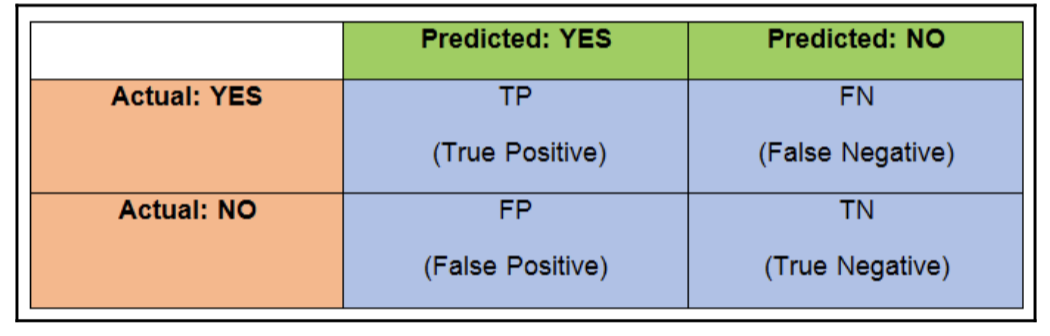

In [37]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[97,  4],
       [ 5, 65]])

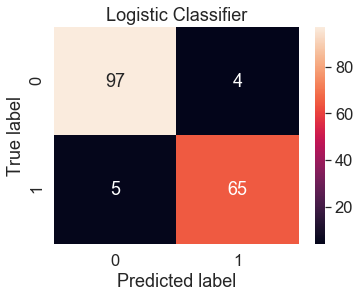

In [38]:
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Logistic Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Precision
- What proportion of positive identifications were actually correct?


- How to use information found in a Confusion Matrix to calculate the precision of a model:

$$ Precision = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}}=\frac{TP}{TP+FP}$$

In [39]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_pred) 

0.9420289855072463

- **Of all patients we predicted have breast cancer, what fraction of them actually have cancer?**

### Recall
- What proportion of actual positives were identified correctly?

$$Recall = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}}=\frac{TP}{TP+FN} $$ 

In [40]:
recall_score(y_test, y_pred) 

0.9285714285714286

- **Of all patients in the set that actually have cancer, what fraction did we correctly detect?**

### $F_1\ Score$
- Combines precision and recall into a single metric.
- **A simple way to compare two classifiers.** 
- The harmonic mean of precision and recall (the regular mean treats all values equally, the harmonic mean gives much more weight to low values.)
- **A classifier will only get a high F1 score if both recall and precision are high.**
- Favors classifiers that have similar precision and recall. This is not always what you want: in some contexts you mostly care about precision, and in other contexts you really care about recall.

$$F_1\ Score = 2\times \frac{Precision\times  Recall}{Precision + Recall}$$


In [41]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.935251798561151

## The ROC Curve

- The best performing models will have an ROC curve that hugs the upper left corner of the graph.

In [42]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(log_reg, X_train, y_train, cv=5,
method="decision_function")

In [43]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

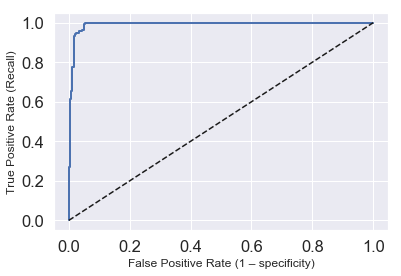

In [44]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlabel('False Positive Rate (1 – specificity)', fontsize=12) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=12)
    plt.grid(True)      
plot_roc_curve(fpr, tpr)
plt.show()

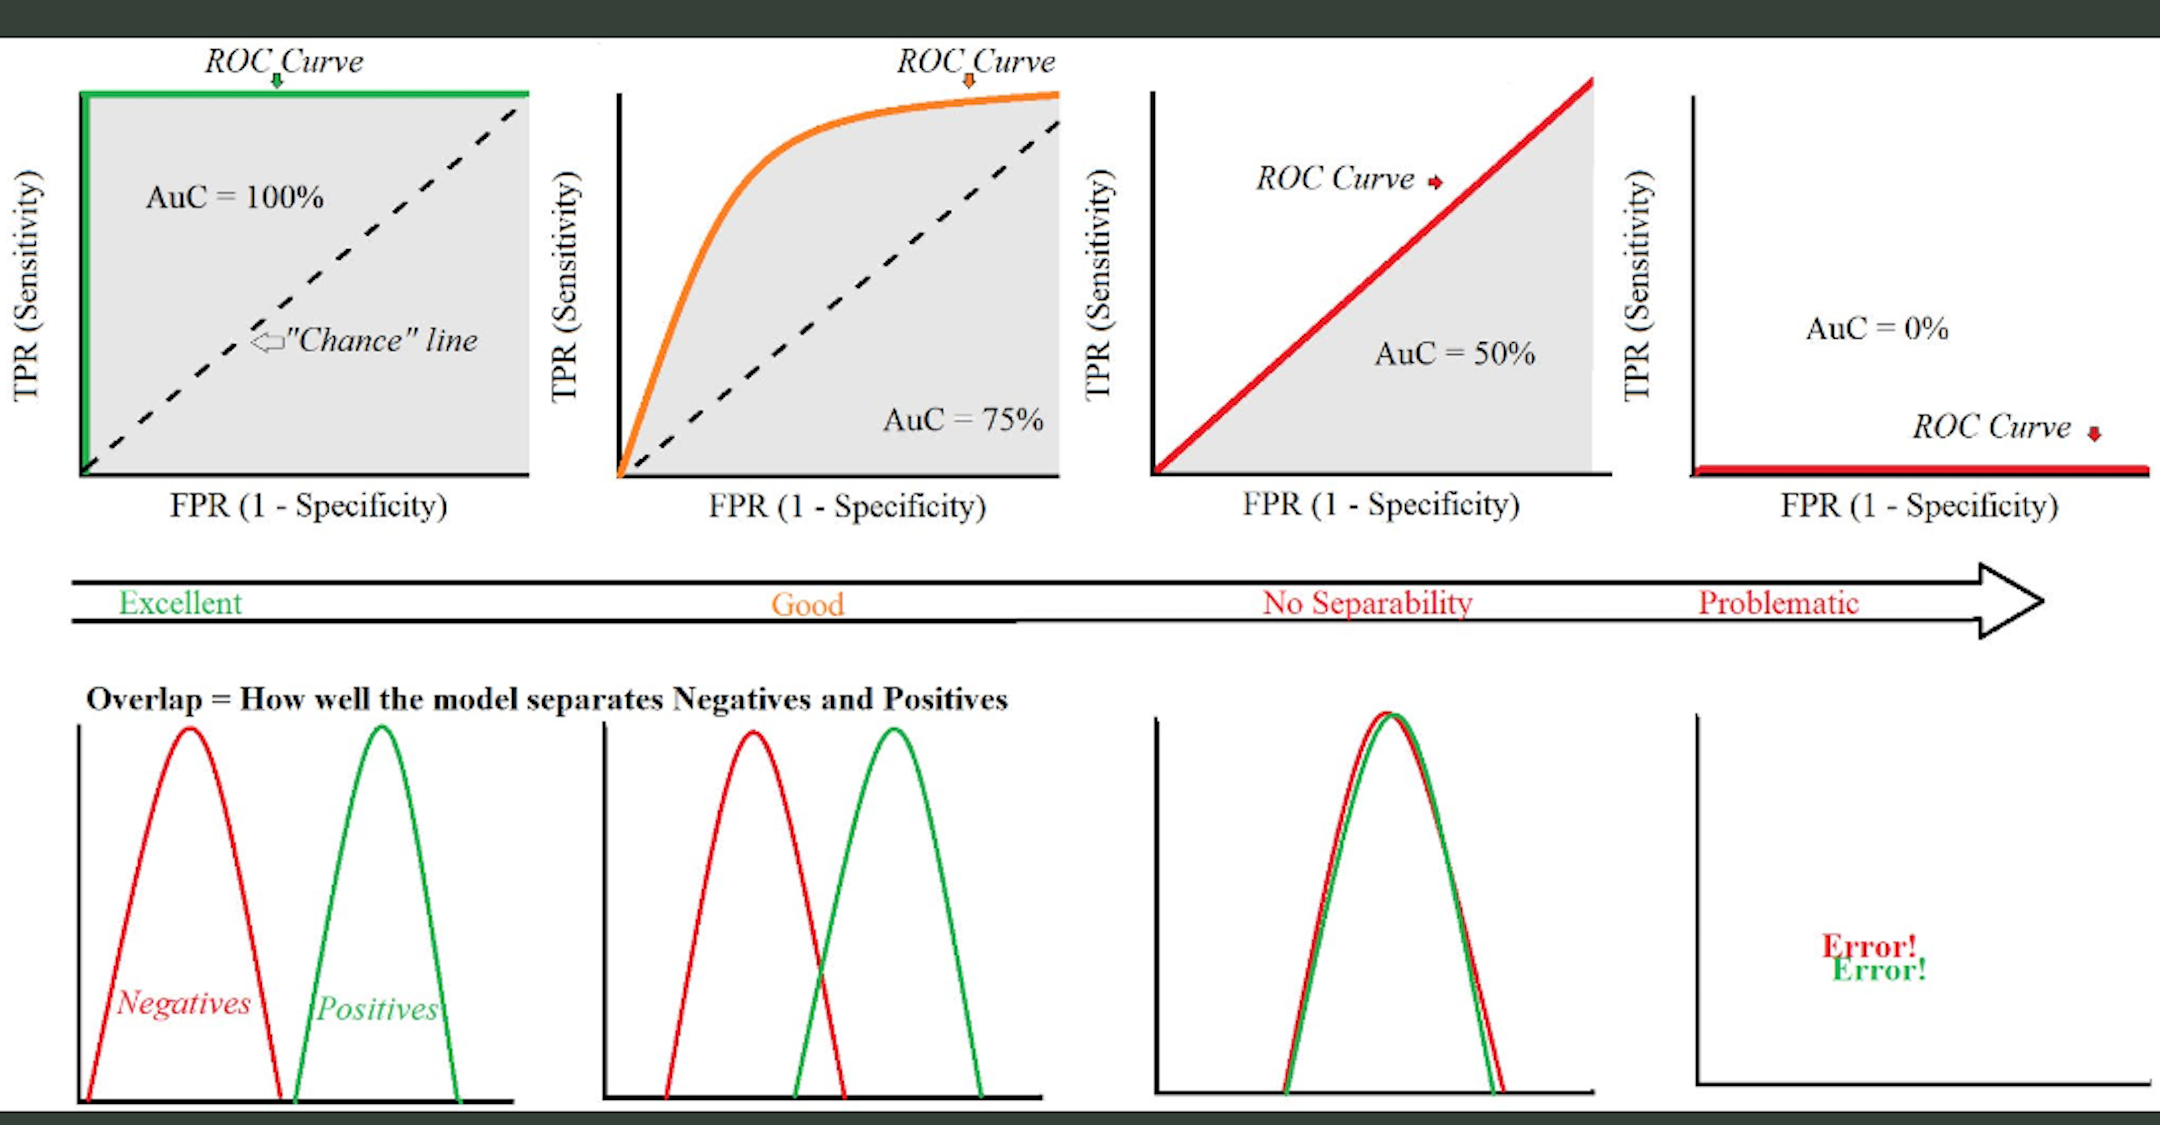

### AUC
- Another way to compare classifiers.
- A perfect classifier will have a ROC AUC equal to 1, 
- Purely random classifier will have a ROC AUC equal to 0.5.

In [45]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

0.9918060200668897

## Important Lesson

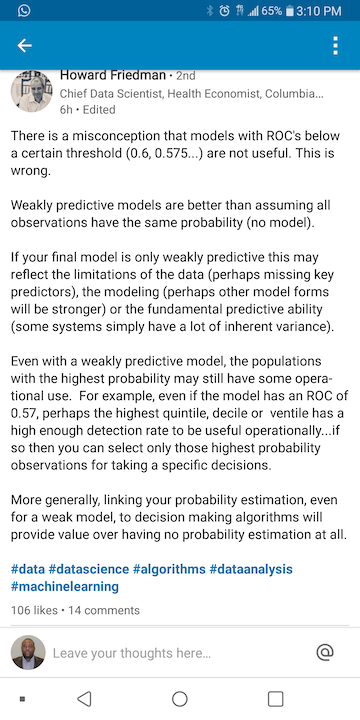

## Example Training Classifier

### MNIST dataset 

which is a set of 70,000 small
images of digits handwritten by high school students and employees of the US Cen‐
sus Bureau. Each image is labeled with the digit it represents. This set has been stud‐
ied so much that it is often called the “Hello World” of Machine Learning: whenever
people come up with a new classification algorithm, they are curious to see how it
will perform on MNIST. Whenever someone learns Machine Learning, sooner or
later they tackle MNIST.
Scikit-Learn provides many helper functions to download popular datasets. MNIST is
one of them. The following code fetches the MNIST dataset:1

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


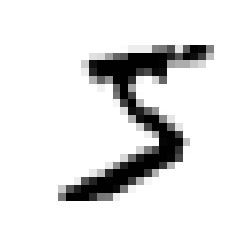

In [33]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
some_digit = X[0]
y = y.astype(np.uint8)
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [4]:
y[0]

5

## Finding Five

### Train Test Split

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [6]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

In [7]:
#Create a logistic Classifier
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1.0)

#Train the model using the training sets
log_reg.fit(X_train, y_train_5)



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [8]:
#Predict the response for test dataset
y_pred = log_reg.predict(X_test)

In [9]:
y_pred

array([False, False, False, ..., False,  True, False])

In [21]:
yprob = log_reg.predict_proba(X_test)
yprob
yprob[:5]

array([[9.99821466e-01, 1.78533656e-04],
       [8.98462904e-01, 1.01537096e-01],
       [9.90775527e-01, 9.22447335e-03],
       [9.99824060e-01, 1.75940379e-04],
       [9.99968307e-01, 3.16931164e-05]])

In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score(log_reg, X_train, y_train_5, cv=3, scoring="accuracy")

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.9737 , 0.97145, 0.97275])

In [24]:
#cross_val_predict() 
# performs K-fold cross-validation, but instead of returning the evaluation scores,
#it returns the predictions made on each test fold.
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(log_reg, X_train, y_train_5, cv=3)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53961,   618],
       [ 1024,  4397]])

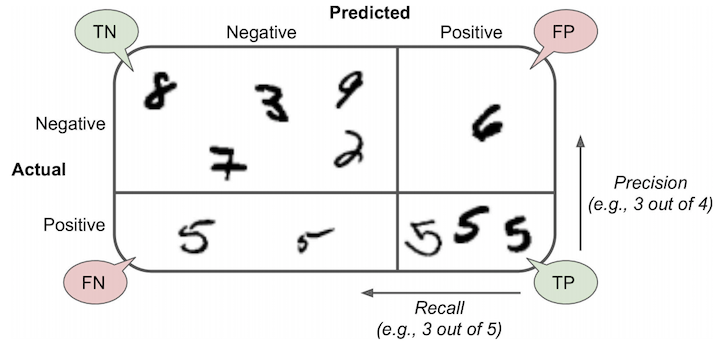

In [26]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8767696909272183

In [27]:
recall_score(y_train_5, y_train_pred) 

0.8111049621840989

- When our models claims an image represents a 5, it is correct only 87.7% of the time. 
- It only detects 81.1% of the 5s.

In [28]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.8426600229973169

In [30]:
from sklearn.metrics import roc_curve
y_scores = cross_val_predict(log_reg, X_train, y_train_5, cv=3,
method="decision_function")
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


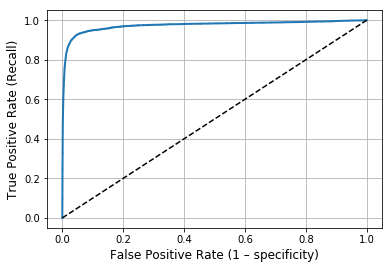

In [31]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlabel('False Positive Rate (1 – specificity)', fontsize=12) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=12)
    plt.grid(True)      
plot_roc_curve(fpr, tpr)
plt.show()

In [32]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9736402701405843